In [2]:
from nltk.probability import FreqDist
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
import numpy as np
import matplotlib.pyplot as plt
nltk.download('punkt')
import json

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alicemartin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [64]:
split = "train"

### Validation set

In [65]:
with open('../../data/vqa-v2/v2_OpenEnded_mscoco_{}2014_questions.json'.format(split)) as json_file:
    data = json.load(json_file)

In [66]:
df=pd.read_json(json.dumps(data["questions"]))

In [67]:
len(df)

443757

In [68]:
df.head()

,image_id,question,question_id
0,458752,What is this photo taken looking through?,458752000
1,458752,What position is this man playing?,458752001
2,458752,What color is the players shirt?,458752002
3,458752,Is this man a professional baseball player?,458752003
4,262146,What color is the snow?,262146000


### Stats on the Questions Dataset.

In [69]:
token=word_tokenize(" ".join(df.question))

In [70]:
fdist = FreqDist(token)

In [71]:
fdist

FreqDist({'?': 443931, 'the': 322348, 'What': 183878, 'is': 163718, 'Is': 113213, 'this': 87653, 'are': 70942, 'in': 68451, 'on': 62923, 'of': 58767, ...})

In [72]:
fdist1 = fdist.most_common(30)
#fdist1

In [73]:
fdist1_dict={ key:value for key,value in fdist1}

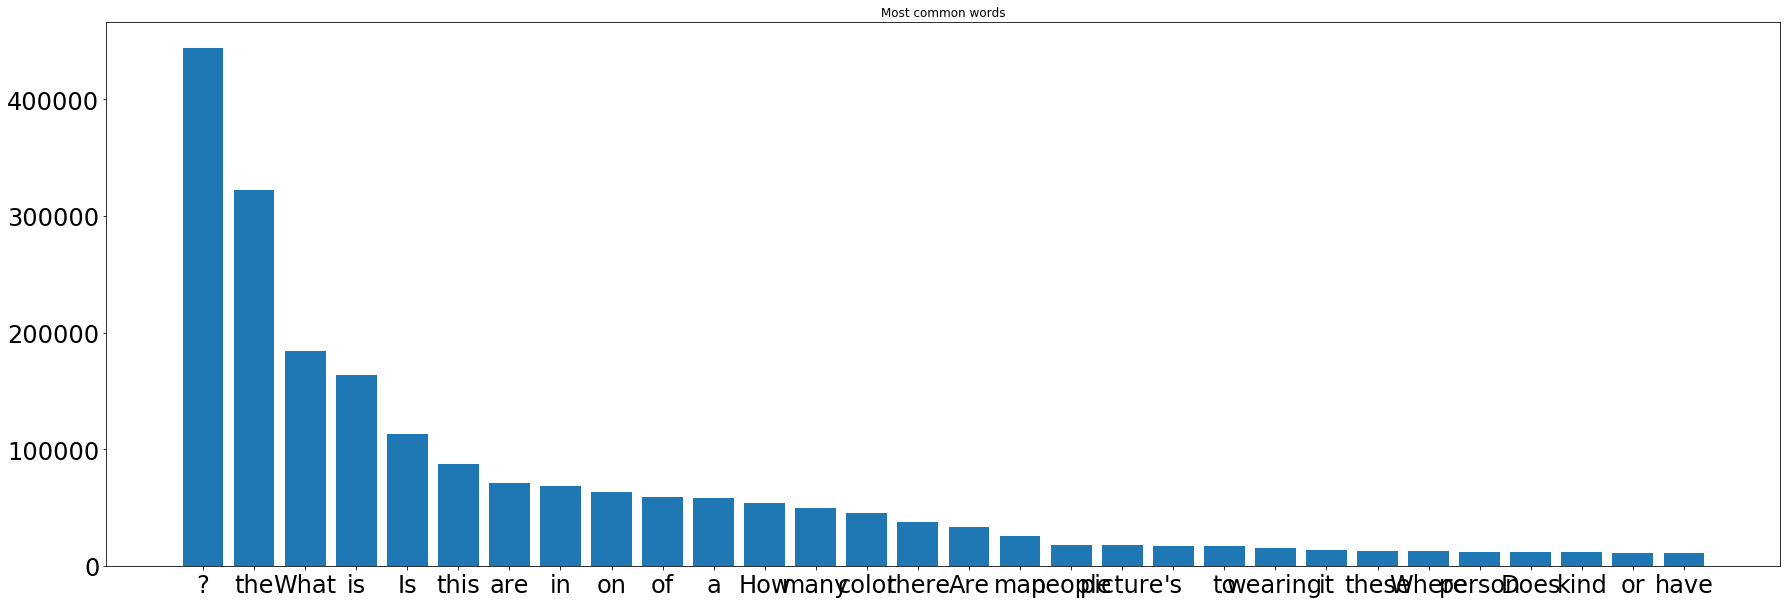

In [74]:
plt.figure(figsize=(30,10))
plt.title("Most common words")
plt.bar(fdist1_dict.keys(), fdist1_dict.values())
plt.tick_params(labelsize=24)
plt.savefig("vqa_{}_dataset_most_common_words.png".format(split))

In [75]:
len_func=lambda t : len(word_tokenize(t))

In [76]:
len_questions=df.question.apply(len_func)

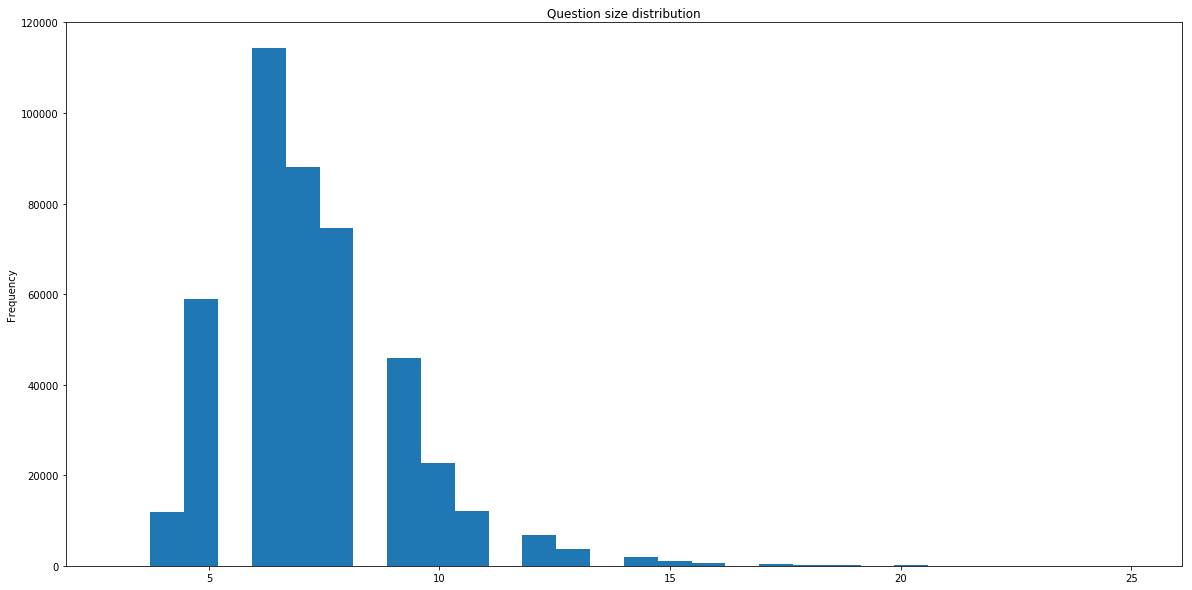

In [77]:
plt.figure(figsize=(20,10))
plt.title("Question size distribution")
len_questions.plot.hist(bins=30)
plt.savefig("vqa_{}_dataset_question_size_distribution.png".format(split))

In [78]:
import numpy as np
np.mean(len_questions)

7.24905522617108

### Stats on the answers

In [79]:
import _pickle as cPickle

In [80]:
answer_path = "../../data/vqa-v2/cache/{}_target.pkl".format(split)
answers = cPickle.load(open(answer_path, "rb"))
answers = sorted(answers, key=lambda x: x["question_id"])

In [81]:
answers[0]

{'image_id': 9, 'labels': [841], 'scores': [1], 'question_id': 9000}

In [82]:
def get_num_answers(answers):
    num_answers = []
    for ans in answers:
        num_ans = len(ans["labels"])
        num_answers.append(num_ans)
    return num_answers

In [83]:
num_answers = get_num_answers(answers)
NUM_ANS = pd.Series(num_answers)

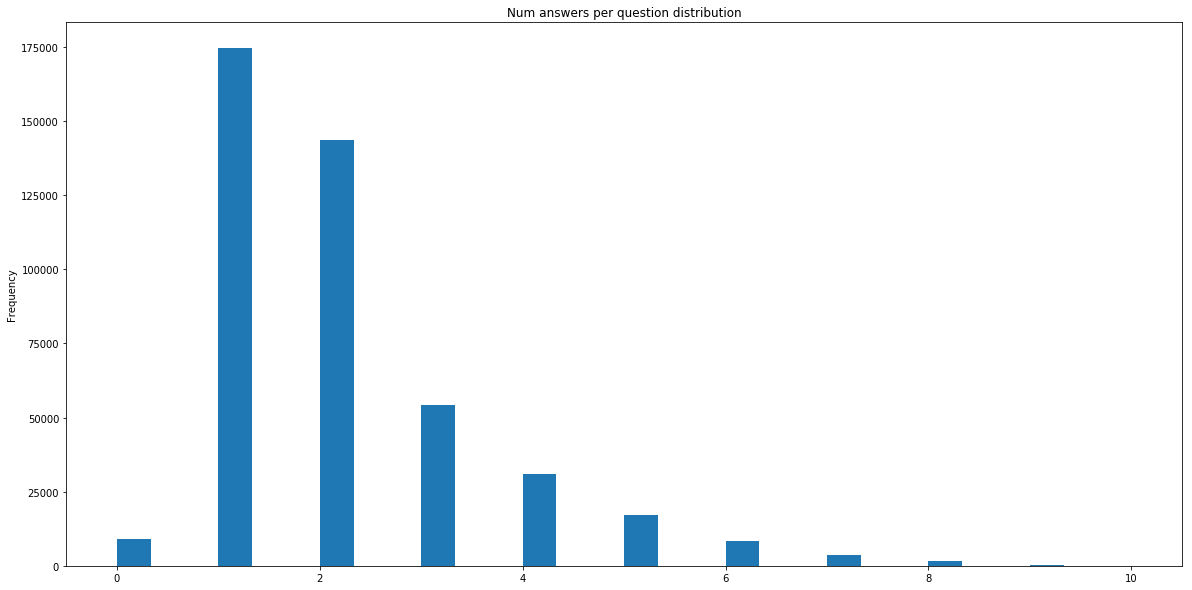

In [84]:
plt.figure(figsize=(20,10))
plt.title("Num answers per question distribution")
NUM_ANS.plot.hist(bins=30)
plt.savefig('vqa_{}_dataset_num_answers_distrib.png'.format(split))

In [85]:
import os
label2ans_path = os.path.join("../../data/vqa-v2", "cache", "trainval_label2ans.pkl")
label2ans = cPickle.load(open(label2ans_path, "rb"))
ans2label_path = os.path.join("../../data/vqa-v2", "cache", "trainval_ans2label.pkl")
ans2label = cPickle.load(open(ans2label_path, "rb"))

In [86]:
label2ans = {v:k for k,v in ans2label.items()}

In [87]:
def get_word_answers(answers, label2ans):
    word_answers = []
    for ans in answers:
        if len(ans['labels']) > 0:
            for l in ans['labels']:
                word_answers.append(label2ans[l])
    return word_answers

In [88]:
word_answers = get_word_answers(answers, label2ans)

In [89]:
word_answers[:5]

['2', 'pink and yellow', 'broccoli', 'tree', 'trees']

In [90]:
ans_token=word_tokenize(" ".join(pd.Series(word_answers)))

In [91]:
fdist_ans = FreqDist(ans_token)

In [92]:
fdist_ans

FreqDist({'yes': 124749, 'no': 123189, 'white': 24429, '2': 22291, '1': 20680, 'and': 16746, 'black': 15479, '3': 14559, 'blue': 13096, 'red': 12906, ...})

In [93]:
fdist_ans20 = fdist_ans.most_common(20)
fdistans_dict={ key:value for key,value in fdist_ans20}

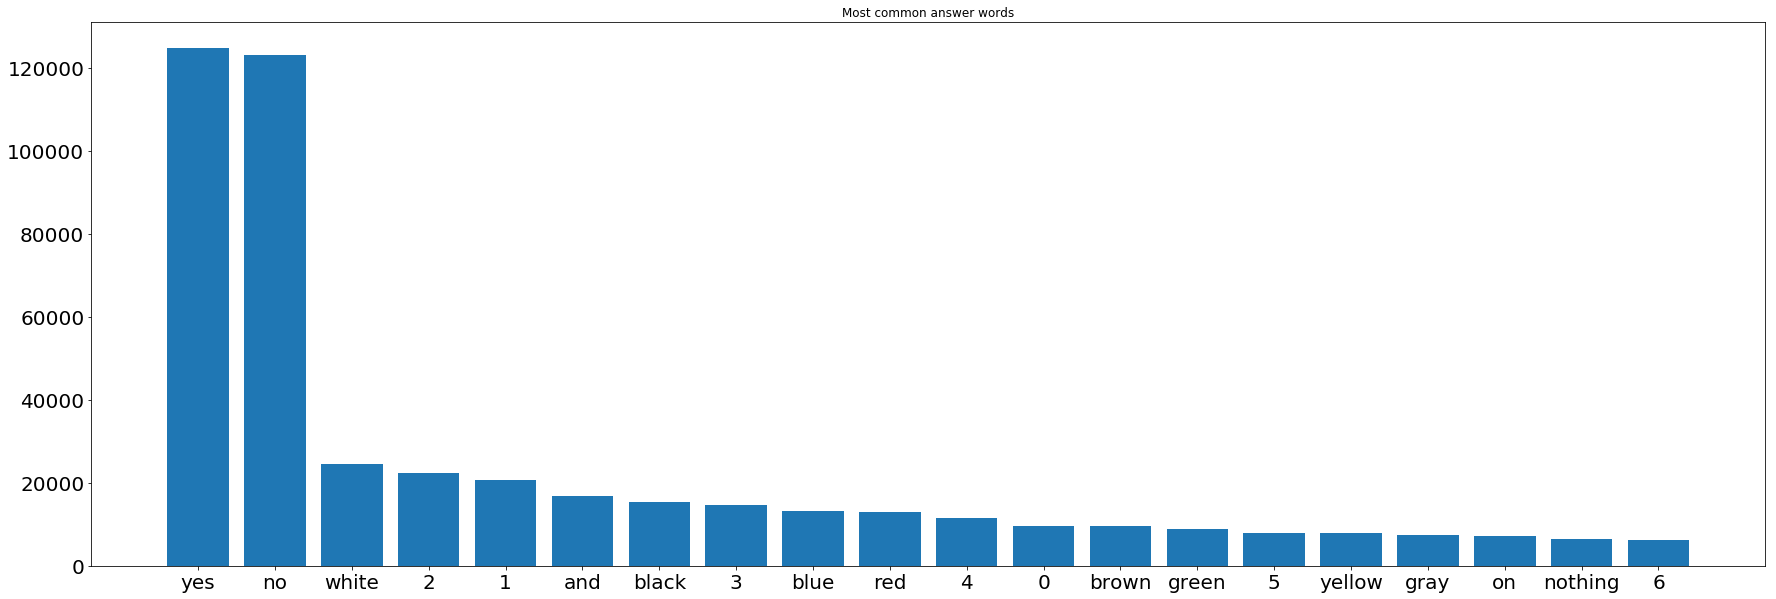

In [94]:
plt.figure(figsize=(30,10))
plt.title("Most common answer words")
plt.bar(fdistans_dict.keys(), fdistans_dict.values())
plt.tick_params(labelsize=20)
plt.savefig('vqa_{}_dataset_most_common_answers.png'.format(split))